In [1]:
import pandas as pd
import numpy as np
import json as j
import pickle as p
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats
import sys
import matplotlib.pyplot as plt

from IPython.display import display_html

In [2]:
shared_path = 'C:/Users/Jonas/git/thesis/code/shared'
if shared_path not in sys.path:
    sys.path.append(shared_path)
    
from Argument import Argument
from DataHandler import DataHandler

In [3]:
data = DataHandler()
data.load_bin('C:/Users/Jonas/git/thesis/not-gitted/argsme-crawled/1629700068.9873986-4566-arguments-cleaned.pickle')

In [4]:
data.validate()

True

In [5]:
BASE_PATH = 'results/GW 2021-09-27'

In [6]:
arg_contexts = dict()
for a in data.get_arguments():
    arg_contexts[a.arg_id] = a.query

In [7]:
j.dump(arg_contexts, open(f'{BASE_PATH}/arg_contexts.json', 'w'))

# Result analysis

In [8]:
arg_contexts = j.load(open(f'{BASE_PATH}/arg_contexts.json', 'r'))

In [9]:
generic_context_results = pd.read_csv(f'{BASE_PATH}/exp00-contra-lexrank-generic.csv')
generic_context_results.shape

(11, 1205)

In [10]:
print(generic_context_results.shape)
context_level_results = pd.read_csv(f'{BASE_PATH}/exp00-contra-lexrank.csv')
print(context_level_results.shape)
context_level_results = generic_context_results.append(context_level_results[1:], ignore_index=True)
context_level_results

(11, 1205)
(37, 1205)


,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,comedy_edge_corr,comedy_silhouette_coef,albert_einstein_edge_corr,albert_einstein_silhouette_coef,jim_morrison_edge_corr,...,american_airlines_flight_77_edge_corr,american_airlines_flight_77_silhouette_coef,born-again_edge_corr,born-again_silhouette_coef,my_little_pony:_friendship_is_magic_edge_corr,my_little_pony:_friendship_is_magic_silhouette_coef,spongebob_squarepants_edge_corr,spongebob_squarepants_silhouette_coef,free_trade_edge_corr,free_trade_silhouette_coef
0,NaN,NaN,NaN,0.103404,-0.049328,0.066139,-0.051839,0.175228,-0.044304,0.030827,...,0.062452,-0.039952,0.243716,0.008966,0.143100,-0.039190,0.127859,-0.060357,0.086019,-0.044036
1,1.0,0.0,0.0,0.239414,0.044665,0.212581,-0.001949,0.195085,0.034361,0.194556,...,0.268871,0.046367,0.273693,0.067812,0.237082,0.013096,0.234091,0.040811,0.233782,0.024570
2,0.9,0.1,0.0,0.240747,0.046016,0.215121,0.003395,0.200218,0.036217,0.208299,...,0.284115,0.049430,0.270468,0.064169,0.235521,0.012935,0.243730,0.065019,0.188672,0.004903
3,0.8,0.2,0.0,0.246366,0.047025,0.218694,0.022058,0.202380,0.042796,0.254627,...,0.275611,0.051075,0.293477,0.089948,0.234957,0.008734,0.271993,0.066374,0.212866,0.034238
4,0.7,0.3,0.0,0.251951,0.047691,0.232745,0.009312,0.280625,0.069444,0.260911,...,0.243407,0.042224,0.269578,0.082750,0.260366,0.057710,0.285971,0.072174,0.217621,0.036900
5,0.6,0.4,0.0,0.261976,0.049647,0.246036,0.008884,0.319400,0.071041,0.261646,...,0.239853,0.040659,0.271076,0.067695,0.268148,0.046503,0.275855,0.066585,0.229279,0.020669
6,0.5,0.5,0.0,0.270164,0.051141,0.243579,0.004349,0.309453,0.053468,0.262452,...,0.249901,0.039802,0.273644,0.079710,0.270439,0.053044,0.284577,0.059725,0.259552,0.041356
7,0.4,0.6,0.0,0.274036,0.051309,0.262050,0.024051,0.309453,0.053468,0.262452,...,0.236420,0.032445,0.278480,0.075260,0.271452,0.038301,0.324425,0.066122,0.259552,0.041356
8,0.3,0.7,0.0,0.276330,0.052239,0.263138,0.023089,0.309453,0.053468,0.262538,...,0.210988,0.026462,0.278480,0.075260,0.291846,0.063677,0.334912,0.072527,0.273815,0.033664
9,0.2,0.8,0.0,0.280563,0.053252,0.263138,0.023089,0.307278,0.050998,0.370637,...,0.234286,0.041230,0.319901,0.080291,0.291846,0.063677,0.316895,0.070691,0.273815,0.033664


In [11]:
%%time
generic_arg_results = pd.read_csv(f'{BASE_PATH}/exp00-contra-lexrank-arg-level-generic.csv')
arg_level_results = pd.read_csv(f'{BASE_PATH}/exp00-contra-lexrank-arg-level.csv')
arg_level_results = generic_arg_results.append(arg_level_results, ignore_index=True)
print(arg_level_results.shape)
arg_level_results.head()

(205804, 8)
Wall time: 270 ms


,d_1,d_2,d_3,arg_id,argumentativeness,weighted_degree_centrality,soc,arg_length
0,1.0,0.0,0.0,Se633c9e7-A70155d34,0.684036,3.003155,0.877249,3.0
1,1.0,0.0,0.0,Se633c9e7-A5dc2e417,0.656976,4.623747,0.786156,6.0
2,1.0,0.0,0.0,Se633c9e7-A465a0213,0.707786,2.773115,0.763661,4.0
3,1.0,0.0,0.0,S81e6e829-A67b74aa1,0.674753,20.668541,0.784058,24.0
4,1.0,0.0,0.0,Sb1860dbe-Ad3377f3e,0.622722,15.954550,0.766546,23.0


In [12]:
%%time
arg_level_results['param_combo'] = arg_level_results.apply(lambda row: (row.d_1, row.d_2,row.d_3), axis=1)
arg_level_results['context'] = arg_level_results.arg_id.apply(lambda arg_id: arg_contexts[arg_id])
arg_level_results['normalized_weighted_degree_centrality'] = arg_level_results.apply(lambda row: row.weighted_degree_centrality/row.arg_length, axis=1)
arg_level_results.head()

Wall time: 11.2 s


,d_1,d_2,d_3,arg_id,argumentativeness,weighted_degree_centrality,soc,arg_length,param_combo,context,normalized_weighted_degree_centrality
0,1.0,0.0,0.0,Se633c9e7-A70155d34,0.684036,3.003155,0.877249,3.0,"(1.0, 0.0, 0.0)",2003_invasion_of_iraq,1.001052
1,1.0,0.0,0.0,Se633c9e7-A5dc2e417,0.656976,4.623747,0.786156,6.0,"(1.0, 0.0, 0.0)",2003_invasion_of_iraq,0.770624
2,1.0,0.0,0.0,Se633c9e7-A465a0213,0.707786,2.773115,0.763661,4.0,"(1.0, 0.0, 0.0)",2003_invasion_of_iraq,0.693279
3,1.0,0.0,0.0,S81e6e829-A67b74aa1,0.674753,20.668541,0.784058,24.0,"(1.0, 0.0, 0.0)",abortion,0.861189
4,1.0,0.0,0.0,Sb1860dbe-Ad3377f3e,0.622722,15.954550,0.766546,23.0,"(1.0, 0.0, 0.0)",abortion,0.693676


In [13]:
arg_level_results[arg_level_results.d_3 > 0] # see right, check

,d_1,d_2,d_3,arg_id,argumentativeness,weighted_degree_centrality,soc,arg_length,param_combo,context,normalized_weighted_degree_centrality
44740,0.2,0.9,0.1,Se633c9e7-A70155d34,0.652847,2.960418,0.903436,3.0,"(0.2, 0.9, 0.1)",2003_invasion_of_iraq,0.986806
44741,0.2,0.9,0.1,Se633c9e7-A5dc2e417,0.654393,4.198230,0.758999,6.0,"(0.2, 0.9, 0.1)",2003_invasion_of_iraq,0.699705
44742,0.2,0.9,0.1,Se633c9e7-A465a0213,0.676787,2.902390,0.783876,4.0,"(0.2, 0.9, 0.1)",2003_invasion_of_iraq,0.725598
44743,0.2,0.9,0.1,S81e6e829-A67b74aa1,0.673410,8.327873,0.381623,24.0,"(0.2, 0.9, 0.1)",abortion,0.346995
44744,0.2,0.9,0.1,Sb1860dbe-Ad3377f3e,0.657993,18.115831,0.806877,23.0,"(0.2, 0.9, 0.1)",abortion,0.787645
...,...,...,...,...,...,...,...,...,...,...,...
205799,0.9,0.9,0.8,S314d7267-A3f222f25,0.649835,9.794283,0.438613,33.0,"(0.9, 0.9, 0.8)",student_athletes,0.296796
205800,0.9,0.9,0.8,S774186bb-Ac8499505,0.627475,4.620754,0.820417,5.0,"(0.9, 0.9, 0.8)",student_athletes,0.924151
205801,0.9,0.9,0.8,S774186bb-A1eadcb17,0.689314,4.648474,0.952885,3.0,"(0.9, 0.9, 0.8)",student_athletes,1.549491
205802,0.9,0.9,0.8,S23a958ca-A46359452,0.673269,5.483886,0.623673,11.0,"(0.9, 0.9, 0.8)",student_athletes,0.498535


Now, we average the argumentativeness, weighted degree centrality and soc over each context to obtain a value on the same abstraction level as silhouette and edge correlation. Please note that weighted degree centrality must be normalized be the length of the argument otherwise it would increase with the number of sentences.

In [14]:
arg_level_results_grouped_by_context_param_combo = arg_level_results[['context', 'param_combo', 'argumentativeness', 'normalized_weighted_degree_centrality', 'soc', 'd_1', 'd_2','d_3']].groupby(by=['context','param_combo']).mean()
arg_level_results_grouped_by_context_param_combo

argumentativeness  \
context               param_combo                          
2003_invasion_of_iraq (0.1, 0.9, 0.0)           0.661342   
                      (0.2, 0.8, 0.0)           0.661342   
                      (0.2, 0.9, 0.1)           0.661342   
                      (0.3, 0.7, 0.0)           0.661342   
                      (0.3, 0.8, 0.1)           0.661342   
...                                                  ...   
zoophilia             (0.9, 0.6, 0.5)           0.602271   
                      (0.9, 0.7, 0.6)           0.622139   
                      (0.9, 0.8, 0.7)           0.620280   
                      (0.9, 0.9, 0.8)           0.612674   
                      (1.0, 0.0, 0.0)           0.655676   

                                       normalized_weighted_degree_centrality  \
context               param_combo                                              
2003_invasion_of_iraq (0.1, 0.9, 0.0)                               0.804036   
                      (0.2, 0.8, 0.0)                               0.804036   
                      (0.2, 0.9, 0.1)                               0.804036   
                      (0.3, 0.7, 0.0)                               0.804036   
                      (0.3, 0.8, 0.1)                               0.804036   
...                                                                      ...   
zoophilia             (0.9, 0.6, 0.5)                               0.463803   
                      (0.9, 0.7, 0.6)                               0.454870   
                      (0.9, 0.8, 0.7)                               0.451589   
                      (0.9, 0.9, 0.8)                               0.437962   
                      (1.0, 0.0, 0.0)                               0.825861   

                                            soc  d_1  d_2  d_3  
context               param_combo                               
2003_invasion_of_iraq (0.1, 0.9, 0.0)  0.815448  0.1  0.9  0.0  
                      (0.2, 0.8, 0.0)  0.815448  0.2  0.8  0.0  
                      (0.2, 0.9, 0.1)  0.815437  0.2  0.9  0.1  
                      (0.3, 0.7, 0.0)  0.815448  0.3  0.7  0.0  
                      (0.3, 0.8, 0.1)  0.815437  0.3  0.8  0.1  
...                                         ...  ...  ...  ...  
zoophilia             (0.9, 0.6, 0.5)  0.503589  0.9  0.6  0.5  
                      (0.9, 0.7, 0.6)  0.498330  0.9  0.7  0.6  
                      (0.9, 0.8, 0.7)  0.499610  0.9  0.8  0.7  
                      (0.9, 0.9, 0.8)  0.486843  0.9  0.9  0.8  
                      (1.0, 0.0, 0.0)  0.799548  1.0  0.0  0.0  

[27416 rows x 6 columns]

In [15]:
for context in set(arg_contexts.values()):
    if context in arg_level_results_grouped_by_context_param_combo.index.levels[0]:
        #context_level_results[f'{context}_argumentativeness'] = [0] + list(arg_level_results_grouped_by_context_param_combo.loc[context].argumentativeness.values)
        #context_level_results[f'{context}_degree_centrality'] = [0] + list(arg_level_results_grouped_by_context_param_combo.loc[context].normalized_weighted_degree_centrality.values)
        #context_level_results[f'{context}_soc'] = [0] + list(arg_level_results_grouped_by_context_param_combo.loc[context].soc.values)
        
        cont = arg_level_results_grouped_by_context_param_combo.loc[context]
        for index, row in cont.iterrows():
            target_idx = context_level_results[np.isclose(context_level_results.d_1, row.d_1) & np.isclose(context_level_results.d_2, row.d_2) & np.isclose(context_level_results.d_3, row.d_3)].index
            context_level_results.loc[target_idx, f'{context}_argumentativeness'] = row.argumentativeness
            context_level_results.loc[target_idx, f'{context}_degree_centrality'] = row.normalized_weighted_degree_centrality
            context_level_results.loc[target_idx, f'{context}_soc'] = row.soc        

In [16]:
context_level_results[context_level_results.d_3 > 0]

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,comedy_edge_corr,comedy_silhouette_coef,albert_einstein_edge_corr,albert_einstein_silhouette_coef,jim_morrison_edge_corr,...,human_rights_soc,zoophilia_argumentativeness,zoophilia_degree_centrality,zoophilia_soc,sarah_palin_argumentativeness,sarah_palin_degree_centrality,sarah_palin_soc,same-sex_marriage_argumentativeness,same-sex_marriage_degree_centrality,same-sex_marriage_soc
11,0.2,0.9,0.1,0.270325,0.047188,0.204093,0.008936,0.226078,0.039328,0.298974,...,0.768428,0.620417,0.573356,0.585898,0.618020,0.459603,0.645813,0.641631,0.675439,0.706404
12,0.3,0.8,0.1,0.267471,0.046737,0.222792,0.016546,0.226078,0.039328,0.291240,...,0.796394,0.622448,0.598156,0.597021,0.610044,0.450766,0.622170,0.654703,0.720836,0.757418
13,0.4,0.7,0.1,0.263071,0.046158,0.197334,0.004187,0.258497,0.052418,0.389998,...,0.815621,0.622448,0.598156,0.597021,0.613934,0.469943,0.640057,0.657325,0.761849,0.794278
14,0.5,0.6,0.1,0.260529,0.045475,0.167392,-0.007553,0.258497,0.052418,0.391105,...,0.809124,0.642200,0.655275,0.642855,0.620071,0.491123,0.673809,0.662532,0.784964,0.794211
15,0.6,0.5,0.1,0.254301,0.044113,0.167392,-0.007553,0.252209,0.056453,0.286951,...,0.808181,0.642890,0.642776,0.629444,0.615921,0.538436,0.689729,0.662715,0.785776,0.792118
16,0.7,0.4,0.1,0.251961,0.043962,0.157862,-0.016603,0.226471,0.060629,0.281143,...,0.828498,0.641842,0.640284,0.639673,0.617521,0.507707,0.648776,0.662878,0.800262,0.798853
17,0.8,0.3,0.1,0.247812,0.043293,0.162539,-0.019265,0.180410,0.028727,0.296457,...,0.828498,0.640599,0.635871,0.629520,0.612953,0.487782,0.616964,0.670030,0.810731,0.802483
18,0.9,0.2,0.1,0.245895,0.042639,0.162539,-0.019265,0.212897,0.033297,0.282772,...,0.827873,0.648784,0.649831,0.637277,0.605399,0.504530,0.625397,0.673018,0.797987,0.782572
19,0.3,0.9,0.2,0.284348,0.052190,0.202313,-0.003893,0.258497,0.052418,0.243435,...,0.817451,0.630326,0.559089,0.572845,0.616022,0.450717,0.616668,0.658606,0.637803,0.660672
20,0.4,0.8,0.2,0.281168,0.051455,0.182722,0.001378,0.258497,0.052418,0.243435,...,0.810199,0.629559,0.551275,0.547142,0.621155,0.478644,0.631828,0.661487,0.682054,0.698081


Next, we want to compute mean argumentativeness, degree centrality and soc over the different context per parameter value combination.

In [17]:
arg_level_results_grouped_by_param_combo = arg_level_results[['context', 'param_combo', 'argumentativeness', 'normalized_weighted_degree_centrality', 'soc', 'd_1', 'd_2','d_3']].groupby(by=['param_combo']).mean()
arg_level_results_grouped_by_param_combo.head()

,argumentativeness,normalized_weighted_degree_centrality,soc,d_1,d_2,d_3
param_combo,,,,,,
"(0.1, 0.9, 0.0)",0.623622,0.669050,0.679866,0.1,0.9,0.0
"(0.2, 0.8, 0.0)",0.625465,0.683617,0.696469,0.2,0.8,0.0
"(0.2, 0.9, 0.1)",0.632309,0.700323,0.712842,0.2,0.9,0.1
"(0.3, 0.7, 0.0)",0.626863,0.694394,0.709556,0.3,0.7,0.0
"(0.3, 0.8, 0.1)",0.633338,0.711040,0.719647,0.3,0.8,0.1


In [18]:
arg_level_results_grouped_by_param_combo[arg_level_results_grouped_by_param_combo.d_3 > 0]

,argumentativeness,normalized_weighted_degree_centrality,soc,d_1,d_2,d_3
param_combo,,,,,,
"(0.2, 0.9, 0.1)",0.632309,0.700323,0.712842,0.2,0.9,0.1
"(0.3, 0.8, 0.1)",0.633338,0.711040,0.719647,0.3,0.8,0.1
"(0.3, 0.9, 0.2)",0.628705,0.659262,0.663417,0.3,0.9,0.2
"(0.4, 0.7, 0.1)",0.634828,0.722839,0.727040,0.4,0.7,0.1
"(0.4, 0.8, 0.2)",0.629140,0.668132,0.669115,0.4,0.8,0.2
"(0.4, 0.9, 0.3)",0.626880,0.635324,0.636351,0.4,0.9,0.3
"(0.5, 0.6, 0.1)",0.636454,0.735412,0.733931,0.5,0.6,0.1
"(0.5, 0.7, 0.2)",0.630281,0.678232,0.675526,0.5,0.7,0.2
"(0.5, 0.8, 0.3)",0.627547,0.642897,0.640360,0.5,0.8,0.3


In [19]:
context_level_results['avg_argumentativeness'] = ''
context_level_results['avg_degree_centrality'] = ''
context_level_results['avg_soc'] = ''

for index, row in arg_level_results_grouped_by_param_combo.iterrows():
    #print(row)
    target_idx = context_level_results[np.isclose(context_level_results.d_1, row.d_1) & np.isclose(context_level_results.d_2, row.d_2) & np.isclose(context_level_results.d_3, row.d_3)].index
    #print(target_idx)
    context_level_results.loc[target_idx, 'avg_argumentativeness'] = row.argumentativeness
    context_level_results.loc[target_idx, 'avg_degree_centrality'] = row.normalized_weighted_degree_centrality
    context_level_results.loc[target_idx, 'avg_soc'] = row.soc
    
context_level_results.loc[0, 'avg_argumentativeness'] = 0.
context_level_results.loc[0, 'avg_degree_centrality'] = 0.
context_level_results.loc[0, 'avg_soc'] = 0.

In [20]:
context_level_results.head(10)

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,comedy_edge_corr,comedy_silhouette_coef,albert_einstein_edge_corr,albert_einstein_silhouette_coef,jim_morrison_edge_corr,...,zoophilia_soc,sarah_palin_argumentativeness,sarah_palin_degree_centrality,sarah_palin_soc,same-sex_marriage_argumentativeness,same-sex_marriage_degree_centrality,same-sex_marriage_soc,avg_argumentativeness,avg_degree_centrality,avg_soc
0,NaN,NaN,NaN,0.103404,-0.049328,0.066139,-0.051839,0.175228,-0.044304,0.030827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,1.0,0.0,0.0,0.239414,0.044665,0.212581,-0.001949,0.195085,0.034361,0.194556,...,0.799548,0.614049,0.577602,0.712728,0.684259,0.800951,0.775932,0.64728,0.837147,0.800889
2,0.9,0.1,0.0,0.240747,0.046016,0.215121,0.003395,0.200218,0.036217,0.208299,...,0.791554,0.613186,0.566161,0.690460,0.668823,0.805136,0.783510,0.644618,0.82196,0.793875
3,0.8,0.2,0.0,0.246366,0.047025,0.218694,0.022058,0.202380,0.042796,0.254627,...,0.781641,0.608817,0.518626,0.674780,0.663675,0.786509,0.782827,0.641131,0.79775,0.78292
4,0.7,0.3,0.0,0.251951,0.047691,0.232745,0.009312,0.280625,0.069444,0.260911,...,0.767325,0.611998,0.523907,0.685853,0.658994,0.781204,0.773805,0.637718,0.771766,0.768694
5,0.6,0.4,0.0,0.261976,0.049647,0.246036,0.008884,0.319400,0.071041,0.261646,...,0.715677,0.605859,0.469460,0.640715,0.660261,0.759453,0.781119,0.634032,0.744079,0.751996
6,0.5,0.5,0.0,0.270164,0.051141,0.243579,0.004349,0.309453,0.053468,0.262452,...,0.645373,0.606676,0.462965,0.644865,0.653327,0.734584,0.776577,0.630571,0.720318,0.734131
7,0.4,0.6,0.0,0.274036,0.051309,0.262050,0.024051,0.309453,0.053468,0.262452,...,0.629239,0.603057,0.429575,0.600028,0.646885,0.712474,0.750741,0.628254,0.704914,0.7204
8,0.3,0.7,0.0,0.276330,0.052239,0.263138,0.023089,0.309453,0.053468,0.262538,...,0.629239,0.600016,0.402109,0.554133,0.648196,0.699094,0.726824,0.626863,0.694394,0.709556
9,0.2,0.8,0.0,0.280563,0.053252,0.263138,0.023089,0.307278,0.050998,0.370637,...,0.629851,0.600808,0.388746,0.531395,0.645093,0.680602,0.679860,0.625465,0.683617,0.696469


In [21]:
context_level_results[context_level_results.d_3 > 0]

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,comedy_edge_corr,comedy_silhouette_coef,albert_einstein_edge_corr,albert_einstein_silhouette_coef,jim_morrison_edge_corr,...,zoophilia_soc,sarah_palin_argumentativeness,sarah_palin_degree_centrality,sarah_palin_soc,same-sex_marriage_argumentativeness,same-sex_marriage_degree_centrality,same-sex_marriage_soc,avg_argumentativeness,avg_degree_centrality,avg_soc
11,0.2,0.9,0.1,0.270325,0.047188,0.204093,0.008936,0.226078,0.039328,0.298974,...,0.585898,0.618020,0.459603,0.645813,0.641631,0.675439,0.706404,0.632309,0.700323,0.712842
12,0.3,0.8,0.1,0.267471,0.046737,0.222792,0.016546,0.226078,0.039328,0.291240,...,0.597021,0.610044,0.450766,0.622170,0.654703,0.720836,0.757418,0.633338,0.71104,0.719647
13,0.4,0.7,0.1,0.263071,0.046158,0.197334,0.004187,0.258497,0.052418,0.389998,...,0.597021,0.613934,0.469943,0.640057,0.657325,0.761849,0.794278,0.634828,0.722839,0.72704
14,0.5,0.6,0.1,0.260529,0.045475,0.167392,-0.007553,0.258497,0.052418,0.391105,...,0.642855,0.620071,0.491123,0.673809,0.662532,0.784964,0.794211,0.636454,0.735412,0.733931
15,0.6,0.5,0.1,0.254301,0.044113,0.167392,-0.007553,0.252209,0.056453,0.286951,...,0.629444,0.615921,0.538436,0.689729,0.662715,0.785776,0.792118,0.638213,0.748359,0.741784
16,0.7,0.4,0.1,0.251961,0.043962,0.157862,-0.016603,0.226471,0.060629,0.281143,...,0.639673,0.617521,0.507707,0.648776,0.662878,0.800262,0.798853,0.639499,0.761553,0.748356
17,0.8,0.3,0.1,0.247812,0.043293,0.162539,-0.019265,0.180410,0.028727,0.296457,...,0.629520,0.612953,0.487782,0.616964,0.670030,0.810731,0.802483,0.640665,0.775151,0.75552
18,0.9,0.2,0.1,0.245895,0.042639,0.162539,-0.019265,0.212897,0.033297,0.282772,...,0.637277,0.605399,0.504530,0.625397,0.673018,0.797987,0.782572,0.641417,0.784413,0.758712
19,0.3,0.9,0.2,0.284348,0.052190,0.202313,-0.003893,0.258497,0.052418,0.243435,...,0.572845,0.616022,0.450717,0.616668,0.658606,0.637803,0.660672,0.628705,0.659262,0.663417
20,0.4,0.8,0.2,0.281168,0.051455,0.182722,0.001378,0.258497,0.052418,0.243435,...,0.547142,0.621155,0.478644,0.631828,0.661487,0.682054,0.698081,0.62914,0.668132,0.669115


In [22]:
avg_context_results = context_level_results[['d_1','d_2','d_3','avg_edge_corr','avg_silhouette_coef','avg_argumentativeness', 'avg_degree_centrality', 'avg_soc']]
avg_context_results['normalized_avg_edge_corr'] = avg_context_results.avg_edge_corr.apply(lambda a: (a-avg_context_results.avg_edge_corr.min())/(avg_context_results.avg_edge_corr.max()-avg_context_results.avg_edge_corr.min()))
avg_context_results['normalized_avg_silhouette_coef'] = avg_context_results.avg_silhouette_coef.apply(lambda a: (a-avg_context_results.avg_silhouette_coef.min())/(avg_context_results.avg_silhouette_coef.max()-avg_context_results.avg_silhouette_coef.min()))
#plot_data = avg_context_results[['d_1','d_2','d_3','avg_edge_corr','avg_silhouette_coef','avg_argumentativeness']]

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Both silhouette coefficient and edge correlation aim at assessing the same phenomenon: contrastiveness and representativeness. Do the measures agree?

In [23]:
spearmanr(avg_context_results.avg_edge_corr, avg_context_results.avg_silhouette_coef)

SpearmanrResult(correlation=0.9758325624421833, pvalue=2.2916616339045116e-31)

In [24]:
pearsonr(avg_context_results.avg_edge_corr, avg_context_results.avg_silhouette_coef)

(0.9326846797081783, 1.4893627445192147e-21)

Correlation between silhouette and edge correlation suggest an agreement.

The same holds for the average degree centrality and summary-original-comparison:

In [25]:
spearmanr(avg_context_results.avg_soc, avg_context_results.avg_degree_centrality)

SpearmanrResult(correlation=0.991558741905643, pvalue=1.4205341970691905e-41)

In [26]:
pearsonr(avg_context_results.avg_soc, avg_context_results.avg_degree_centrality)

(0.9955307826947818, 9.042869688334132e-48)

__Which parameter combination yields the best results according to edge correlation and silhouette coefficient?__

We observe that the argumenativeness scoring does not coincide with the employed lexicon-based arg-scorer.

In [27]:
g = 2/3

avg_context_results['weighted_silhouete_arg'] = avg_context_results.apply(lambda a: g * a.avg_silhouette_coef + (1-g) * a.avg_argumentativeness, axis=1)
avg_context_results['weighted_edge_arg'] = avg_context_results.apply(lambda a: g * a.avg_edge_corr + (1-g) * a.avg_argumentativeness, axis=1)
avg_context_results.sort_values(by=['weighted_silhouete_arg'], ascending=False)

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,avg_argumentativeness,avg_degree_centrality,avg_soc,normalized_avg_edge_corr,normalized_avg_silhouette_coef,weighted_silhouete_arg,weighted_edge_arg
44,0.8,0.9,0.7,0.309248,0.059921,0.622392,0.594343,0.594165,0.994069,1.000000,0.247411,0.413629
43,0.9,0.7,0.6,0.305004,0.058491,0.623724,0.609315,0.604721,0.973576,0.986918,0.246902,0.411244
45,0.9,0.8,0.7,0.307005,0.058860,0.622914,0.599416,0.597366,0.983240,0.990295,0.246878,0.412308
42,0.8,0.8,0.6,0.305197,0.058497,0.623425,0.60395,0.602073,0.974506,0.986966,0.246806,0.411273
46,0.9,0.9,0.8,0.310476,0.059254,0.62177,0.590598,0.590802,1.000000,0.993901,0.246759,0.414241
38,0.7,0.8,0.5,0.302858,0.057553,0.624391,0.614328,0.610049,0.963209,0.978331,0.246499,0.410035
37,0.6,0.9,0.5,0.304821,0.057782,0.623493,0.607626,0.606561,0.972692,0.980424,0.246352,0.411045
41,0.7,0.9,0.6,0.304109,0.057714,0.622834,0.599197,0.598826,0.969252,0.979802,0.246087,0.410350
40,0.9,0.6,0.5,0.297561,0.055850,0.625733,0.62741,0.6184,0.937630,0.962741,0.245811,0.406952
31,0.9,0.4,0.3,0.284252,0.053148,0.63083,0.675695,0.659396,0.873360,0.938005,0.245709,0.399778


In [29]:
avg_context_results.sort_values(by=['avg_degree_centrality'], ascending=False)

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,avg_argumentativeness,avg_degree_centrality,avg_soc,normalized_avg_edge_corr,normalized_avg_silhouette_coef,weighted_silhouete_arg,weighted_edge_arg
1,1.0,0.0,0.0,0.239414,0.044665,0.64728,0.837147,0.800889,0.656826,0.860362,0.245537,0.375369
2,0.9,0.1,0.0,0.240747,0.046016,0.644618,0.82196,0.793875,0.663265,0.872729,0.245550,0.375371
3,0.8,0.2,0.0,0.246366,0.047025,0.641131,0.79775,0.78292,0.690396,0.881963,0.245060,0.377954
18,0.9,0.2,0.1,0.245895,0.042639,0.641417,0.784413,0.758712,0.688122,0.841813,0.242232,0.377736
17,0.8,0.3,0.1,0.247812,0.043293,0.640665,0.775151,0.75552,0.697383,0.847803,0.242417,0.378763
4,0.7,0.3,0.0,0.251951,0.047691,0.637718,0.771766,0.768694,0.717371,0.888055,0.244367,0.380540
16,0.7,0.4,0.1,0.251961,0.043962,0.639499,0.761553,0.748356,0.717420,0.853920,0.242474,0.381141
15,0.6,0.5,0.1,0.254301,0.044113,0.638213,0.748359,0.741784,0.728716,0.855309,0.242146,0.382271
5,0.6,0.4,0.0,0.261976,0.049647,0.634032,0.744079,0.751996,0.765785,0.905964,0.244442,0.385995
14,0.5,0.6,0.1,0.260529,0.045475,0.636454,0.735412,0.733931,0.758794,0.867772,0.242468,0.385837


We choose result score weighting $\frac{1}{2}$ and $\frac{2}{3}$. Therefore, we go with index 18 as the first contrastive snippet for the $\frac{1}{2}$-weighting. And 44 since it is the highest ranked combo for $\frac{2}{3}$-weighting.

In [38]:
plot_data = avg_context_results.sort_values(by=['weighted_silhouete_arg'], ascending=False)[['d_1','d_2','d_3','avg_edge_corr','avg_silhouette_coef','avg_argumentativeness']]
plot_data.head(10)

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,avg_argumentativeness
44,0.8,0.9,0.7,0.309248,0.059921,0.622392
43,0.9,0.7,0.6,0.305004,0.058491,0.623724
45,0.9,0.8,0.7,0.307005,0.058860,0.622914
42,0.8,0.8,0.6,0.305197,0.058497,0.623425
46,0.9,0.9,0.8,0.310476,0.059254,0.62177
38,0.7,0.8,0.5,0.302858,0.057553,0.624391
37,0.6,0.9,0.5,0.304821,0.057782,0.623493
41,0.7,0.9,0.6,0.304109,0.057714,0.622834
40,0.9,0.6,0.5,0.297561,0.055850,0.625733
31,0.9,0.4,0.3,0.284252,0.053148,0.63083


In [43]:
print(plot_data.to_latex(buf='clr-train-results.tex', index=False))

None


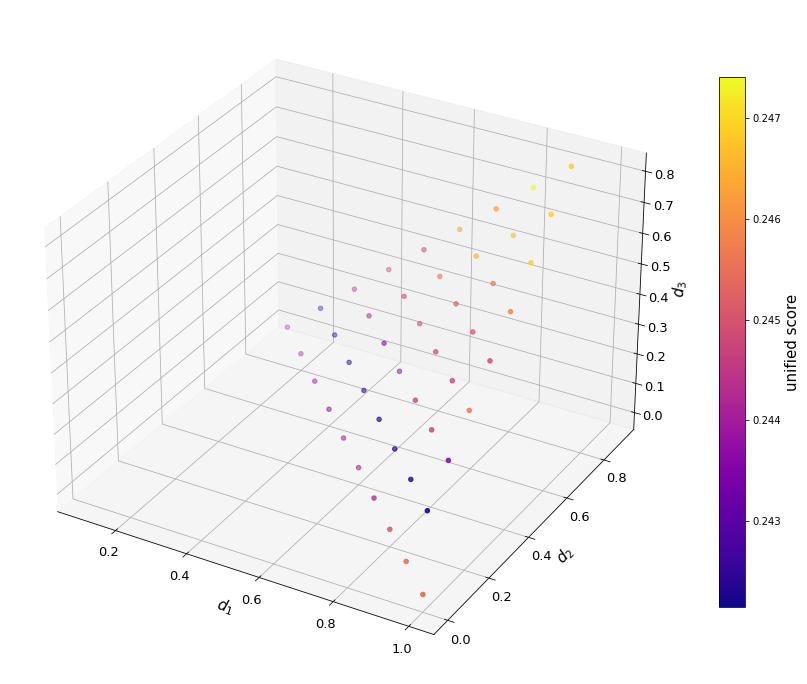

In [58]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = avg_context_results.d_1
y = avg_context_results.d_2
z = avg_context_results.d_3
c = avg_context_results.weighted_silhouete_arg

ax.set_xlabel('$d_1$', size=15)
ax.set_ylabel('$d_2$', size=15)
ax.set_zlabel('$d_3$', size=15)
ax.tick_params(labelsize=13)
#ax.set_title('unified score in function of hyper-parameters', size=20)

img = ax.scatter(x, y, z, c=c, cmap='plasma')
cbar = fig.colorbar(img, shrink=.65)# orientation='horizontal', location='bottom')
cbar.set_label('unified score', rotation=90, size=15)
plt.savefig('clr-results.pdf')
plt.show()

In [59]:
def weighted_scores(a, b, weights=range(0,11,1)):
    idxmax_per_weight = dict()
    for w in weights:
        weight = w/10.0
        combined_score = weight * avg_context_results[a] + (1-weight) * avg_context_results[b]
        idxmax_per_weight[weight] = combined_score.idxmax()
        
    return idxmax_per_weight

In [ ]:
weighted_scores('avg_silhouette_coef', 'avg_argumentativeness')

In [ ]:
weighted_scores('avg_edge_corr', 'avg_argumentativeness')

We consider representativeness, contrastiveness and argumentativeness as equally important and therefore continue with a weight of $0.5$. For applications where one is more important, another setting has to be chosen.

In [62]:
avg_context_results.loc[[44,2]]

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,avg_argumentativeness,avg_degree_centrality,avg_soc,normalized_avg_edge_corr,normalized_avg_silhouette_coef,weighted_silhouete_arg,weighted_edge_arg
44,0.8,0.9,0.7,0.309248,0.059921,0.622392,0.594343,0.594165,0.994069,1.000000,0.247411,0.413629
2,0.9,0.1,0.0,0.240747,0.046016,0.644618,0.82196,0.793875,0.663265,0.872729,0.245550,0.375371


In [66]:
print(avg_context_results.loc[[44,2]][['d_1', 'd_2', 'd_3', 'avg_edge_corr', 'avg_silhouette_coef', 'avg_argumentativeness', 'weighted_silhouete_arg']].to_latex(index=False))

\begin{tabular}{rrrrrlr}
\toprule
 d\_1 &  d\_2 &  d\_3 &  avg\_edge\_corr &  avg\_silhouette\_coef & avg\_argumentativeness &  weighted\_silhouete\_arg \\
\midrule
 0.8 &  0.9 &  0.7 &       0.309248 &             0.059921 &              0.622392 &                0.247411 \\
 0.9 &  0.1 &  0.0 &       0.240747 &             0.046016 &              0.644618 &                0.245550 \\
\bottomrule
\end{tabular}



Are both silhouette and edge correlation significantly higher for contrastive snippets than for the original argument setting? We compare the best param combo (idx=44) with gerneic snippets (.5-weighted representativeness and argumentativeness, idx=2).

In [69]:
silhouette_cols = list(filter(lambda a: a.endswith('silhouette_coef'), context_level_results.columns))[1:] # without avg
edge_cols = list(filter(lambda a: a.endswith('_edge_corr'), context_level_results.columns))[1:] # without avg

Normalverteilung: https://datatab.de/tutorial/test-auf-normalverteilung

Wilcoxon: https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/unterschiede/zentral/wilkoxon.html

Warum 5%: https://matheguru.com/stochastik/signifikanz-signifikanzniveau.html

In [67]:
def test(index: int, cols, threshold=.05, baseline_idx=0):
    """
    Returns true, if there is a significant difference between the baseline and the sample given by the index.
    """
    baseline_silhouette = context_level_results.loc[baseline_idx, cols].values
    print(len(baseline_silhouette))
    basline_slihouette_shapiro = stats.shapiro(baseline_silhouette)
    print('Nullhypothesis: baseline sample is normally distributed. Performing Shapiro-Wilk test.')
    print(f'\t{basline_slihouette_shapiro}')
    if basline_slihouette_shapiro.pvalue < threshold:
        print(f'\tp-value is smaller than {threshold}, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.')
        baseline_normal = False
    else:
        print('\tWe cannot reject the nullhypothesis and therefore assume the data is normally distributed.')
        baseline_normal = True
        
    silhouettes = context_level_results.loc[index, cols].values
    silhouettes_shapiro = stats.shapiro(silhouettes)
    print(f'Nullhypothesis: sample of index {index} is normally distributed. Performing Shapiro-Wilk test.')
    print(f'\t{basline_slihouette_shapiro}')
    if basline_slihouette_shapiro.pvalue < threshold:
        print(f'\tp-value is smaller than {threshold}, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.')
        sample_normal = False
    else:
        print('\tWe cannot reject the nullhypothesis and therefore assume the data is normally distributed.')
        sample_normal = True
        
    if baseline_normal and sample_normal:
        print('Unexpected')
        print('Nullhypothesis: Samples have identical average (no difference); Alt-Hypothesis: There is a difference.')
        results = stats.ttest_rel(baseline_silhouette, silhouettes)
        print(f'\t{results}')
        if results.pvalue < threshold:
            print(f'\tp-value is smaller than {threshold}, thus, we have to reject the nullhypothesis and assume there is a significant difference.')
            print(f'\tmeans: baseline {np.mean(baseline_silhouette)}, tested sample {np.mean(silhouettes)}\n')
            return True
        else:
            print(f'\tWe cannot reject the nullhypothesis and therefore assume ther is no signigicant difference.')
            print(f'\tmeans: baseline {np.mean(baseline_silhouette)}, tested sample {np.mean(silhouettes)}\n')
            return False
    else:
        print('Nullhypothesis: Median of differences is zero; Alt-Hypothesis: Median of differneces is not zero.')
        results = stats.wilcoxon(baseline_silhouette, silhouettes, alternative='less')
        print(f'\t{results}')
        if results.pvalue < threshold:
            print(f'\tp-value is smaller than {threshold}, thus, we have to reject the nullhypothesis and assume there is a significant difference.')
            print(f'\tmeans: baseline {np.mean(baseline_silhouette)}, tested sample {np.mean(silhouettes)}\n')
            return True
        else:
            print(f'\tWe cannot reject the nullhypothesis and therefore assume ther is no signigicant difference.')
            print(f'\tmeans: baseline {np.mean(baseline_silhouette)}, tested sample {np.mean(silhouettes)}\n')
            return False

Does the best param combo yield significant greater results in terms of contrastiveness (according to silhouette and edge correlation)?

In [70]:
idx = 44
print(f'{idx}, silhouette')
print(test(index=idx, cols=silhouette_cols, baseline_idx=2))
print(f'{idx}, edge correlation')
print(test(index=idx, cols=edge_cols, baseline_idx=2))

44, silhouette
600
Nullhypothesis: baseline sample is normally distributed. Performing Shapiro-Wilk test.
	ShapiroResult(statistic=0.9154083728790283, pvalue=8.450446532159066e-18)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.
Nullhypothesis: sample of index 44 is normally distributed. Performing Shapiro-Wilk test.
	ShapiroResult(statistic=0.9154083728790283, pvalue=8.450446532159066e-18)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.
Nullhypothesis: Median of differences is zero; Alt-Hypothesis: Median of differneces is not zero.
	WilcoxonResult(statistic=55003.0, pvalue=1.4971217292840501e-16)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume there is a significant difference.
	means: baseline 0.04601642679976066, tested sample 0.05992056438912791

True
44, edge correlation
600
Nullhypothesis: basel

Yes it does according to edge correlation and silhouette coefficient. ~~No it does not according to silhouette coefficient.~~

Is the argumentativeness significantly higher for the best combo compared to the best baseline? Not really useful analysis...

In [71]:
idx = 44
argQ_cols = list(filter(lambda a: a.endswith('_argumentativeness'), context_level_results.columns))[1:] # without avg
print(len(argQ_cols))
print(f'{idx}, argQ')
print(test(index=idx, cols=argQ_cols, baseline_idx=2))

596
44, argQ
596
Nullhypothesis: baseline sample is normally distributed. Performing Shapiro-Wilk test.
	ShapiroResult(statistic=0.9664887189865112, pvalue=2.0148990809154554e-10)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.
Nullhypothesis: sample of index 44 is normally distributed. Performing Shapiro-Wilk test.
	ShapiroResult(statistic=0.9664887189865112, pvalue=2.0148990809154554e-10)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.
Nullhypothesis: Median of differences is zero; Alt-Hypothesis: Median of differneces is not zero.
	WilcoxonResult(statistic=167641.0, pvalue=1.0)
	We cannot reject the nullhypothesis and therefore assume ther is no signigicant difference.
	means: baseline 0.6441375987985533, tested sample 0.623002743639794

False


No, it is not

Is the representativeness of the best combo significantly higher than for the best baseline (according to degree centrality and soc)?

In [72]:
idx = 44
dc_cols = list(filter(lambda a: a.endswith('_degree_centrality'), context_level_results.columns))[1:] # without avg
print(len(dc_cols))
print(f'{idx}, degree centrality')
print(test(index=idx, cols=dc_cols, baseline_idx=2))

soc_cols = list(filter(lambda a: a.endswith('_soc'), context_level_results.columns))[1:] # without avg
print(len(soc_cols))
print(f'{idx}, SOC')
print(test(index=idx, cols=soc_cols, baseline_idx=2))

596
44, degree centrality
596
Nullhypothesis: baseline sample is normally distributed. Performing Shapiro-Wilk test.
	ShapiroResult(statistic=0.9794325828552246, pvalue=1.987323230423499e-07)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.
Nullhypothesis: sample of index 44 is normally distributed. Performing Shapiro-Wilk test.
	ShapiroResult(statistic=0.9794325828552246, pvalue=1.987323230423499e-07)
	p-value is smaller than 0.05, thus, we have to reject the nullhypothesis and assume our data is not normally distributed.
Nullhypothesis: Median of differences is zero; Alt-Hypothesis: Median of differneces is not zero.
	WilcoxonResult(statistic=176013.0, pvalue=1.0)
	We cannot reject the nullhypothesis and therefore assume ther is no signigicant difference.
	means: baseline 0.8279734685584935, tested sample 0.6118325701080437

False
596
44, SOC
596
Nullhypothesis: baseline sample is normally distributed. Performi

No, it is not.

As we expected, we observe a significant decrease in representativeness. 

<AxesSubplot:>

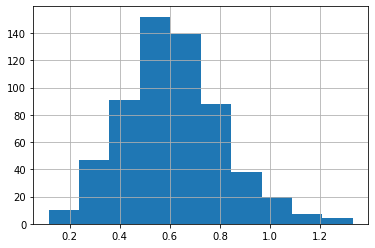

In [73]:
context_level_results.loc[44, dc_cols].hist()

Now, we consider the ranking of sentences according to their argumentativeness, and whether the snippets are high- or low-ranked.

In [31]:
with open('C:/Users/Jonas/git/thesis/code/evaluation/results/GW 2021-09-27/1629700068.9873986-4566-arguments-cleaned-sent-argQ.json', 'r') as file:
    argQ = j.load(file)

len(argQ)

4439

In [32]:
from sklearn.pipeline import Pipeline

from ArgumentativenessScorer import ArgumentativenessScorer
from CentralityScorer import CentralityScorer
from ContraLexRank import ContraLexRank
from ContrastivenessScorer import ContrastivenessScorer

In [33]:
%%time
arguments = data.get_filtered_arguments([DataHandler.get_args_filter_length(length=3), DataHandler.get_args_filter_context_size()])

Wall time: 5.27 s


In [34]:
len(arguments)

4474

In [110]:
pipeline = Pipeline(steps=[
        ('argumentativeness', ArgumentativenessScorer()),
        ('contrastiveness', ContrastivenessScorer()),
        ('centrality', CentralityScorer()),
        #('clr', ContraLexRank(0.5, 0.9, 0.4)),
        #('clr', ContraLexRank(0.8, 0.7, 0.5)),
        ('clr', ContraLexRank(0.8, 0.9, 0.7)),
    ])

In [111]:
%%time
arguments = pipeline.predict(arguments)

Wall time: 7min 14s


In [112]:
argQ_ranks = dict()
for argument in arguments:
    if len(argQ[argument.arg_id]) > 0:
        sentence_indices_arQ_ranked = list(reversed(np.argsort(argQ[argument.arg_id])))
        s0, s1 = argument.excerpt_indices
        argQ_ranks[argument.arg_id] = {
            'absolute': [sentence_indices_arQ_ranked.index(s0), sentence_indices_arQ_ranked.index(s1)],
            'relative': [sentence_indices_arQ_ranked.index(s0)/float(len(argument.sentences)), sentence_indices_arQ_ranked.index(s1)/float(len(argument.sentences))]
        }
    else:
        print(f'{argument.arg_id} has no quality labels')

Se43b4cb7-A96552e56 has no quality labels
S731c9043-A93379e63 has no quality labels


In [113]:
argQ[arguments[1338].arg_id]

[0.5856296420097351,
 0.6846193075180054,
 0.6559640765190125,
 0.6024897694587708,
 0.6662985682487488,
 0.7166236042976379,
 0.6078476309776306,
 0.5759130716323853,
 0.604983389377594,
 0.6636897325515747,
 0.6888830661773682,
 0.7009022235870361,
 0.6568065881729126,
 0.5910623073577881,
 0.6578900814056396,
 0.6730586290359497,
 0.6678466796875,
 0.6552305221557617,
 0.6415610909461975]

In [114]:
z = np.argsort(argQ[arguments[1338].arg_id])
print(z)
print(list(reversed(z)))

[ 7  0 13  3  8  6 18 17  2 12 14  9  4 16 15  1 10 11  5]
[5, 11, 10, 1, 15, 16, 4, 9, 14, 12, 2, 17, 18, 6, 8, 3, 13, 0, 7]


In [115]:
hist_data = np.array([argQ_ranks[k]['relative'] for k in argQ_ranks.keys()])

In [116]:
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
# https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html

In [117]:
xedges = [0, .1,.2,.3, .4,.5,.6,.7,.8,.9,1.]
yedges = [0, .1,.2,.3, .4,.5,.6,.7,.8,.9,1.]
H, xedges, yedges = np.histogram2d(hist_data[:,0], hist_data[:,1], bins=(xedges, yedges))

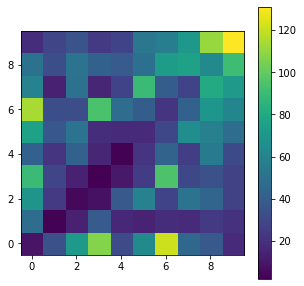

In [118]:
fig = plt.figure(figsize=(5,5))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.imshow(H, origin='lower')
plt.colorbar()

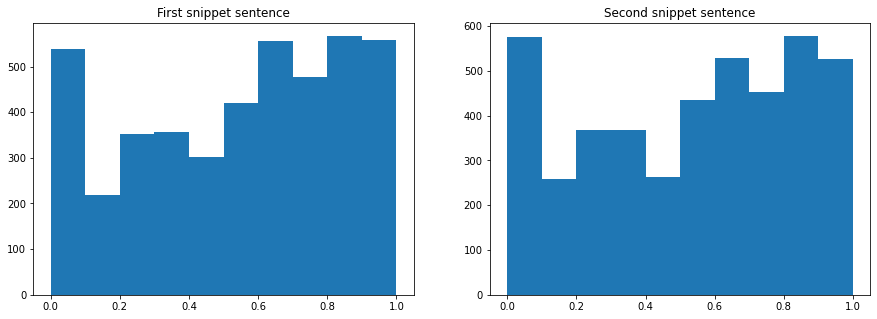

In [119]:
plt.figure(figsize=(15,5))
#plot 1:
plt.subplot(1, 2, 1)
plt.hist(hist_data[:,0], bins=xedges)
plt.title("First snippet sentence")

#plot 2:
plt.subplot(1, 2, 2)
plt.hist(hist_data[:,1], bins=yedges)
plt.title("Second snippet sentence")

plt.show()

Snippet sentences are sometimes high-ranked sentences in terms of arg-q within the given argument, but they are often among the lower ranks.

In [120]:
arg_contexts = {k: [] for k in DataHandler.get_query_context_keys(arguments)}

In [121]:
for k in arg_contexts.keys():
    arg_contexts[k] = DataHandler.get_query_context(arguments, k)

In [122]:
records = list()
for k in arg_contexts.keys():
    a = [len(b.sentences) for b in arg_contexts[k]]
    records.append({
        'context': k,
        'len': len(arg_contexts[k]),
        'arg_lengths': a,
        'mean_arg_length':  np.mean(a),
        'std_arg_length':  np.std(a),
    })
context_sizes = pd.DataFrame.from_records(records)

In [123]:
context_sizes.sort_values(by=['len'], ascending=False)[:20]

,context,len,arg_lengths,mean_arg_length,std_arg_length
300,sex_offender,10,"[6, 25, 24, 30, 30, 24, 45, 28, 41, 65]",31.8,14.884892
330,last_supper,10,"[3, 64, 52, 37, 57, 49, 58, 54, 54, 3]",43.1,21.111371
356,elton_john,10,"[31, 13, 29, 5, 8, 45, 18, 11, 16, 27]",20.3,11.807201
100,nazism,10,"[10, 18, 72, 3, 7, 9, 4, 43, 10, 30]",20.6,20.900718
102,abortion,10,"[24, 23, 10, 28, 19, 6, 53, 11, 11, 11]",19.6,13.101145
350,harry_potter,10,"[22, 6, 8, 12, 10, 4, 6, 28, 5, 7]",10.8,7.560423
345,censorship,10,"[12, 14, 14, 15, 3, 14, 12, 25, 5, 5]",11.9,6.073714
336,women's_rights,10,"[3, 3, 10, 6, 6, 7, 3, 5, 86, 9]",13.8,24.177676
110,fundamentalism,10,"[19, 4, 3, 16, 10, 30, 68, 7, 12, 5]",17.4,18.591396
551,tony_blair,10,"[7, 6, 5, 9, 5, 7, 8, 19, 11, 17]",9.4,4.651881


In [125]:
def print_arg(arg, hl=None):
    html_str = f'<p style="text-align:right">{arg.arg_id}</p><div style="border: solid black 1px; padding-left: 5px">'
    for idx, s in enumerate(arg.sentences):
        if hl is None:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if s in arg.snippet else "white"}">{s}</span><br>'
        else:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if idx in hl else "white"}">{s}</span><br>'
    display_html(html_str+ '</div>', raw=True)

In [1]:
for a in arg_contexts['gentrification']:
    print_arg(a, a.excerpt_indices)

NameError: name 'arg_contexts' is not defined

* Some arguments suffer from definitions for their debates, and thus, they are not helpful in any way. 